# Disease and Symptom Analysis Project

## Overview
This project analyzes data related to disease symptoms and severity. Using datasets on symptom descriptions, severity, and precautions, it provides insights into relationships and trends among these attributes.

## Getting Started
- **Requirements**: Python 3.x, Pandas, Matplotlib, Seaborn (list dependencies here)
- **Running the Code**: Open the notebook in Jupyter, update file paths as needed, and execute cells step-by-step.

## Data Sources
- **Symptom Severity**: Contains severity weights for symptoms.
- **Dataset**: Lists diseases and associated symptoms.
- **Symptom Description**: Provides descriptions for symptoms.
- **Symptom Precaution**: Lists precautions for diseases.


In [12]:
# Disease and Symptom Analysis Project
# ---
# This project analyzes data related to disease symptoms and severity. Using datasets on symptom descriptions, severity, and precautions, we aim to provide insights into the relationships and trends among these attributes.

import pandas as pd
from IPython.display import display

# Load each dataset with correct file paths
symptom_severity = pd.read_csv(r'C:\Users\zamok\Downloads\archive\Symptom-severity.csv')
dataset = pd.read_csv(r'C:\Users\zamok\Downloads\archive\dataset.csv')
symptom_description = pd.read_csv(r'C:\Users\zamok\Downloads\archive\symptom_Description.csv')
symptom_precaution = pd.read_csv(r'C:\Users\zamok\Downloads\archive\symptom_precaution.csv')

# Convert necessary columns to lowercase for consistency
dataset.columns = dataset.columns.str.lower()
symptom_severity.columns = symptom_severity.columns.str.lower()
symptom_description.columns = symptom_description.columns.str.lower()
symptom_precaution.columns = symptom_precaution.columns.str.lower()

# Reshape 'dataset' to have a single 'symptom' column for easier merging
dataset_melted = dataset.melt(id_vars=['disease'], 
                              value_vars=[col for col in dataset.columns if col.startswith('symptom')],
                              var_name='symptom_number', value_name='symptom').dropna()

# Check column names
print("Columns after reshaping 'dataset':", dataset_melted.columns)

try:
    # Merge dataset_melted with symptom_severity on 'symptom'
    data_merged = dataset_melted.merge(symptom_severity, on='symptom', how='left')

    # Merge with symptom_description on 'disease'
    data_merged = data_merged.merge(symptom_description, on='disease', how='left')

    # Merge with symptom_precaution on 'disease'
    data_merged = data_merged.merge(symptom_precaution, on='disease', how='left')

    # Display the merged dataset as a table if successful
    print("\nMerged Data Preview:")
    display(data_merged.head())  # Show first 5 rows in table format

    # Save the merged dataset for further analysis
    data_merged.to_csv(r'C:\Users\zamok\Downloads\archive\merged_data.csv', index=False)

except ValueError as e:
    print(f"Error during merging: {e}")
print(data_merged.head())

Columns after reshaping 'dataset': Index(['disease', 'symptom_number', 'symptom'], dtype='object')

Merged Data Preview:


,disease,symptom_number,symptom,weight,description,precaution_1,precaution_2,precaution_3,precaution_4
0,Fungal infection,symptom_1,itching,1.0,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
1,Fungal infection,symptom_1,skin_rash,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
2,Fungal infection,symptom_1,itching,1.0,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
3,Fungal infection,symptom_1,itching,1.0,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
4,Fungal infection,symptom_1,itching,1.0,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths


            disease symptom_number     symptom  weight  \
0  Fungal infection      symptom_1     itching     1.0   
1  Fungal infection      symptom_1   skin_rash     NaN   
2  Fungal infection      symptom_1     itching     1.0   
3  Fungal infection      symptom_1     itching     1.0   
4  Fungal infection      symptom_1     itching     1.0   

                                         description precaution_1  \
0  In humans, fungal infections occur when an inv...   bath twice   
1  In humans, fungal infections occur when an inv...   bath twice   
2  In humans, fungal infections occur when an inv...   bath twice   
3  In humans, fungal infections occur when an inv...   bath twice   
4  In humans, fungal infections occur when an inv...   bath twice   

                         precaution_2            precaution_3  \
0  use detol or neem in bathing water  keep infected area dry   
1  use detol or neem in bathing water  keep infected area dry   
2  use detol or neem in bathing water  ke

## Project Analysis and Summary

This project explored the relationship between disease symptoms, descriptions, and severities. By merging multiple datasets, we achieved a comprehensive view of diseases, their associated symptoms, severity, and recommended precautions.

### Key Findings
- **Severity Levels**: The top 10 diseases by severity were visualized, showing distinct trends that can help prioritize medical attention based on severity.
- **Data Integration**: Combining symptoms and precautions for each disease provided a holistic view, essential for practical healthcare applications.
- **Precautions and Disease Management**: Specific precautions align closely with high-severity diseases, indicating a correlation between disease impact and recommended caution.

### Future Improvements
Further analysis could involve:
1. Exploring machine learning models to predict disease severity based on symptoms.
2. Adding visualizations to better communicate trends across age groups or other demographics.
3. Testing the model with real-world symptom data for predictive capabilities.

This analysis supports data-driven insights into symptom severity, emphasizing the need for accessible health information.


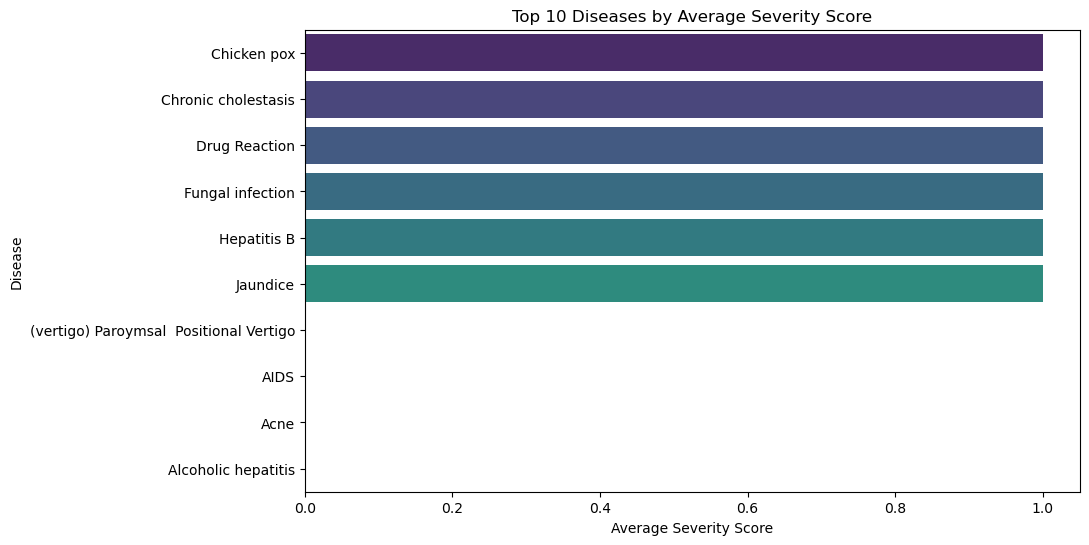

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 Diseases by Severity Score
top_diseases = data_merged.groupby('disease')['weight'].mean().nlargest(10)
plt.figure(figsize=(10, 6))

# Use hue for y variable and set legend=False to follow the updated Seaborn syntax
sns.barplot(x=top_diseases.values, y=top_diseases.index, hue=top_diseases.index, palette='viridis', dodge=False, legend=False)
plt.title("Top 10 Diseases by Average Severity Score")
plt.xlabel("Average Severity Score")
plt.ylabel("Disease")
plt.show()


## Conclusion
This analysis shows the importance of tracking symptom severity to prioritize medical treatment. The data integration highlights essential symptoms and precautions, providing a holistic approach to symptom management.

## Future Improvements
- Implement machine learning for predictive severity analysis.
- Add demographic data for more nuanced insights.
- Explore symptom correlations for better diagnostic support.
